## Lab 6
### Name: Behnam Sobhani Nadri
### Student ID: 801368949

## All libraries that we use in the lab is defined here

In [2]:

import time
import warnings
import pandas as pd
import numpy as np
import seaborn as sb
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn import preprocessing
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms


from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import mean_squared_error

drive.mount('/content/drive')

Mounted at /content/drive


## **Problem I**
###Develop a Fully Connected Neural Network with only one hidden layer (size of 32) to predict the housing value for the housing dataset. Make sure to include all input features. Compare your training loss value and validation results against the linear regression you implemented in Assignment 5. Can you compare your model complexity (number of trainable parameters) against linear regression?

In [3]:
file_path = '/content/drive/My Drive/Courses/Intro to ML/Lab6/Housing.csv'
df_house = pd.read_csv(file_path)

# scaler = 'normalize'
scaler = 'standard'

df_house_1 = (df_house.iloc[:,[4,5,6,7,8,10]] == 'yes').replace(True,1).replace(False,0)
df_house = pd.concat([df_house.iloc[:,[0,1,2,3,4,10,12]], df_house_1], axis = 1)
df_house_2 = pd.DataFrame((df_house.iloc[:,6] == 'furnished').replace(True,1).replace(False,0)).rename(columns={'furnishingstatus':'furnished'})
df_house = pd.concat([df_house, df_house_2], axis = 1)
df_house_3 = pd.DataFrame((df_house.iloc[:,6] == 'unfurnished').replace(True,1).replace(False,0)).rename(columns={'furnishingstatus':'unfurnished'})
df_house = pd.concat([df_house, df_house_3], axis = 1)
df_house_4 = pd.DataFrame((df_house.iloc[:,6] == 'semi-furnished').replace(True,1).replace(False,0)).rename(columns={'furnishingstatus':'semi-furnished'})
df_house = pd.concat([df_house, df_house_4], axis = 1)
df_house = df_house.drop(['furnishingstatus'],axis=1)

X = df_house.iloc[:,1:15].values
Y = df_house.iloc[:,0].values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.8, random_state = 2)

# sc_X = StandardScaler()
# X_train_scaled = sc_X.fit_transform(X_train)
# X_test_scaled = sc_X.fit_transform(X_test)

if scaler == 'normalize':
    min_max_scaled= preprocessing.MinMaxScaler()
else:
    min_max_scaled= preprocessing.StandardScaler()

X_train_scaled = min_max_scaled.fit_transform(X_train)
X_test_scaled = min_max_scaled.fit_transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)


In [ ]:

lr_regressor = LogisticRegression(random_state=1, max_iter=2000).fit(X_train, Y_train)
mlp_regressor = MLPRegressor(solver='lbfgs',hidden_layer_sizes=(32,),random_state=1, max_iter=2000).fit(X_train, Y_train)
# mlp_regressor = MLPRegressor(solver='sgd',random_state=1, max_iter=2000).fit(X_train, Y_train)
# mlp_regressor = MLPRegressor(solver='adam',hidden_layer_sizes=(32,),learning_rate_init=0.01,random_state=42, max_iter=10000).fit(X_train_scaled, Y_train)

Y_mlp = mlp_regressor.predict(X_test)
Y_lr = lr_regressor.predict(X_test)

print("Logistic Regression's MSE on train dataset:", metrics.mean_squared_error(Y_test, Y_lr))
print("MLP's MSE on train dataset:", metrics.mean_squared_error(Y_test, Y_mlp))


Logistic Regression's MSE on train dataset: 3753934149606.881
MLP's MSE on train dataset: 1645678991392.2012


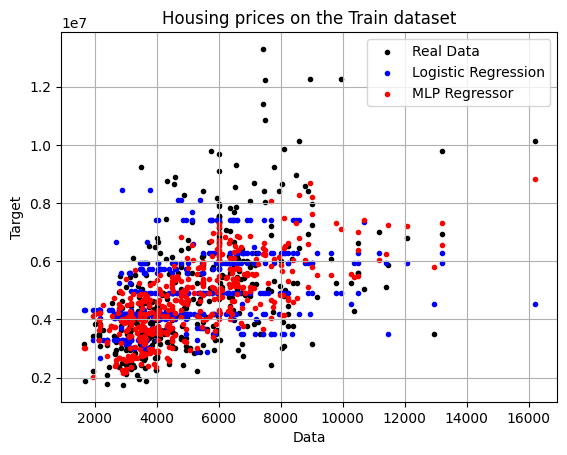

In [ ]:
plt.scatter(X_test.iloc[:,0],Y_test,color='k',marker= '.', label='Real Data')
plt.scatter(X_test.iloc[:,0],Y_lr,color='b',marker= '.', label='Logistic Regression')
plt.scatter(X_test.iloc[:,0],Y_mlp, color='r', marker= '.', label='MLP Regressor')
# plt.scatter(X_train_scaled[:,0],Y_poly_train, color='g', marker= '.',label='Poly SVR')

plt.title('Housing prices on the Train dataset')
plt.xlabel('Data')
plt.ylabel('Target')
plt.legend()
plt.grid()

## **Problem I. A**

### We will increase the network complexity by adding two additional hidden layers, the hidden layers overall. My suggestions for the size of layers are: 32, 64, and 16 respectively. Please redesign the network and compare your training loss value and validation results against the linear regression you implemented in Assignment 5 and Problem 1.a. Can you compare your model complexity? Note: Use the same 20%, and 80% split for training and validation.

In [ ]:

lr_regressor = LogisticRegression(random_state=1, max_iter=2000).fit(X_train, Y_train)
# mlp_regressor = MLPRegressor(solver='lbfgs',hidden_layer_sizes=(32,64,16),alpha=0.01,random_state=1, max_iter=5000).fit(X_train, Y_train)
# mlp_regressor = MLPRegressor(solver='sgd',hidden_layer_sizes=(32,64,16),random_state=1,batch_size=100, max_iter=5000).fit(X_train_scaled, Y_train)
mlp_regressor = MLPRegressor(solver='adam',hidden_layer_sizes=(32,64,16),learning_rate_init=0.1,random_state=42, max_iter=5000).fit(X_train_scaled, Y_train)

Y_mlp = mlp_regressor.predict(X_test)
Y_lr = lr_regressor.predict(X_test)

loss_values = mlp_regressor.loss_curve_

print("Logistic Regression's MSE on train dataset:", metrics.mean_squared_error(Y_test, Y_lr))
print("MLP's MSE on train dataset:", metrics.mean_squared_error(Y_test, Y_mlp))


Logistic Regression's MSE on train dataset: 3753934149606.881
MLP's MSE on train dataset: 7.323582206381716e+20


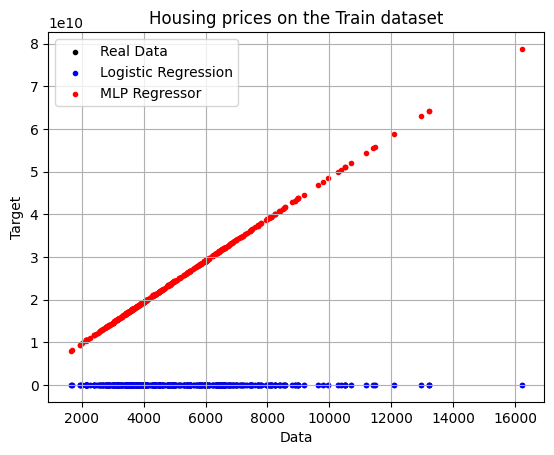

In [ ]:
plt.scatter(X_test.iloc[:,0],Y_test,color='k',marker= '.', label='Real Data')
plt.scatter(X_test.iloc[:,0],Y_lr,color='b',marker= '.', label='Logistic Regression')
plt.scatter(X_test.iloc[:,0],Y_mlp, color='r', marker= '.', label='MLP Regressor')
# plt.scatter(X_train_scaled[:,0],Y_poly_train, color='g', marker= '.',label='Poly SVR')

plt.title('Housing prices on the Train dataset')
plt.xlabel('Data')
plt.ylabel('Target')
plt.legend()
plt.grid()

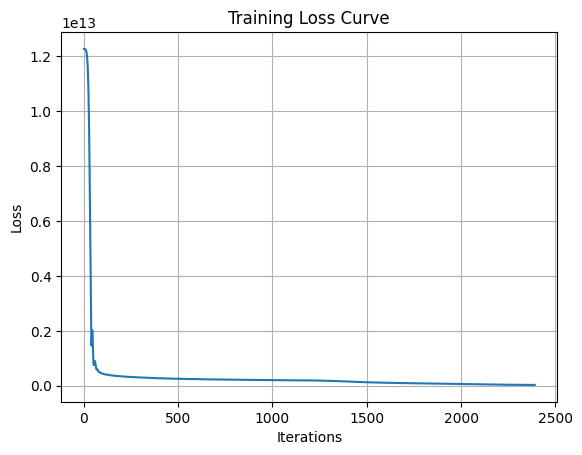

In [ ]:
plt.plot(loss_values)
plt.title('Training Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(1)
plt.show()

## **Problem II**
### Create a fully connected Neural Network for all 10 classes in CIFAR-10 with only one hidden layer with a size of 512. Report your training time, training loss, and evaluation accuracy. Analyze your results in your report. (25pt)

In [ ]:


# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=100, shuffle=True)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=100, shuffle=False)

# Define the number of classes
num_classes = 10


100%|██████████| 170498071/170498071 [00:02<00:00, 66611443.57it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
class SimpleNN(nn.Module):
    def __init__(self, input_size=3*32*32, hidden_size=512, num_classes=10):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = x.view(-1, 3*32*32)  # Flatten the image
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Instantiate the model
model1 = SimpleNN().to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model1.parameters(), lr=0.001)

# Training the model
start_time = time.time()
n_epochs = 300
train_loss = []

for epoch in range(n_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model1(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss.append(running_loss / len(train_loader))
    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {train_loss[-1]:.4f}')

training_time_1 = time.time() - start_time
print(f"Training Time for Model 1: {training_time_1:.2f} seconds")

# Evaluate the model on test data
model1.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model1(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy_1 = 100 * correct / total
print(f'Evaluation Accuracy for Model 1: {accuracy_1:.2f}%')


Epoch [50/300], Loss: 0.2384
Epoch [100/300], Loss: 0.1712
Epoch [150/300], Loss: 0.1258
Epoch [200/300], Loss: 0.1124
Epoch [250/300], Loss: 0.0951
Epoch [300/300], Loss: 0.0993
Training Time for Model 1: 8223.26 seconds
Evaluation Accuracy for Model 1: 51.54%


## **Problem II. A**


##Extend your network with two more additional hidden layers, like the example we did in the lecture (pick the sizes of hidden layers properly). Train your network. Report your training time, loss, and evaluation accuracy after 300 epochs. Analyze your results in your report and compare your model size and accuracy over the baseline implementation in Problem 2.a. Do you see any over-fitting? Can you compare your model complexity against problem 2.a? (35pt)


In [ ]:
class ExtendedNN(nn.Module):
    def __init__(self, input_size=3*32*32, hidden_size=512, num_classes=10):
        super(ExtendedNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 3*32*32)  # Flatten the image
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        return x

# Instantiate the extended model
model2 = ExtendedNN().to(device)

# Loss and optimizer
optimizer = optim.Adam(model2.parameters(), lr=0.001)

# Training the extended model
start_time = time.time()
train_loss = []

for epoch in range(n_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model2(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss.append(running_loss / len(train_loader))
    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {train_loss[-1]:.4f}')

training_time_2 = time.time() - start_time
print(f"Training Time for Model 2: {training_time_2:.2f} seconds")

# Evaluate the extended model on test data
model2.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model2(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy_2 = 100 * correct / total
print(f'Evaluation Accuracy for Model 2: {accuracy_2:.2f}%')


Epoch [50/300], Loss: 0.1638
Epoch [100/300], Loss: 0.1380
Epoch [150/300], Loss: 0.1329
Epoch [200/300], Loss: 0.1772
Epoch [250/300], Loss: 0.1865
Epoch [300/300], Loss: 0.1510
Training Time for Model 2: 12637.58 seconds
Evaluation Accuracy for Model 2: 53.54%
